# Setup

In [ ]:
!pip -q install openai
!pip -q install langchain
!pip -q install langchain_openai # >= 0.1.0
!pip -q install langchain_experimental
!pip -q install sentence-transformers
!pip -q install tiktoken

In [ ]:
!python -c "import openai; print('openai:', openai.__version__)"
!python -c "import langchain; print('langchain:', langchain.__version__)"

In [ ]:
#API KEY 저장을 위한 os 라이브러리 호출
import os
from google.colab import userdata

#OPENAI API키 저장
#API KEY 발급 페이지: https://platform.openai.com/docs/guides/gpt/completions-api
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Embedding

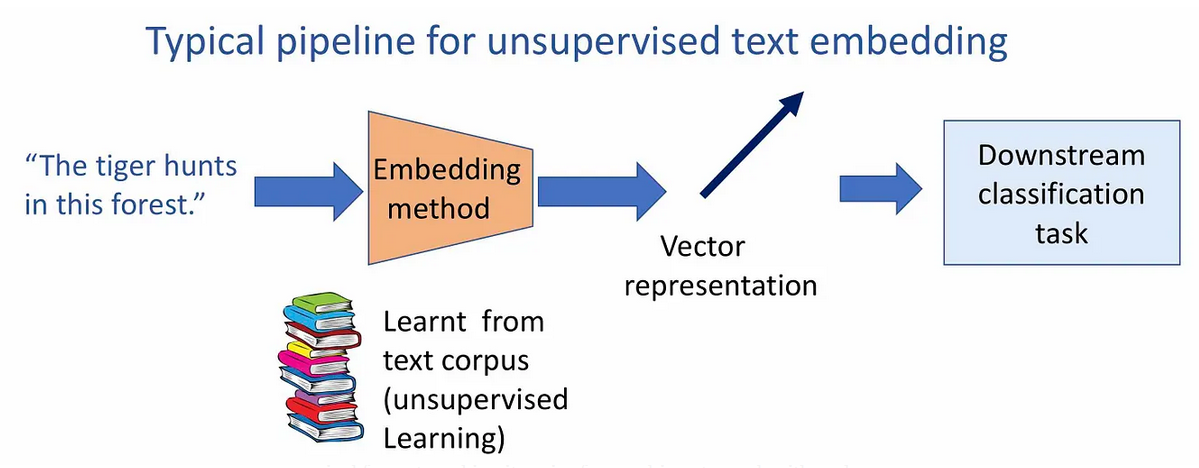

> https://medium.com/@pankaj_pandey/natural-language-understanding-with-text-embeddings-3df046175ca4

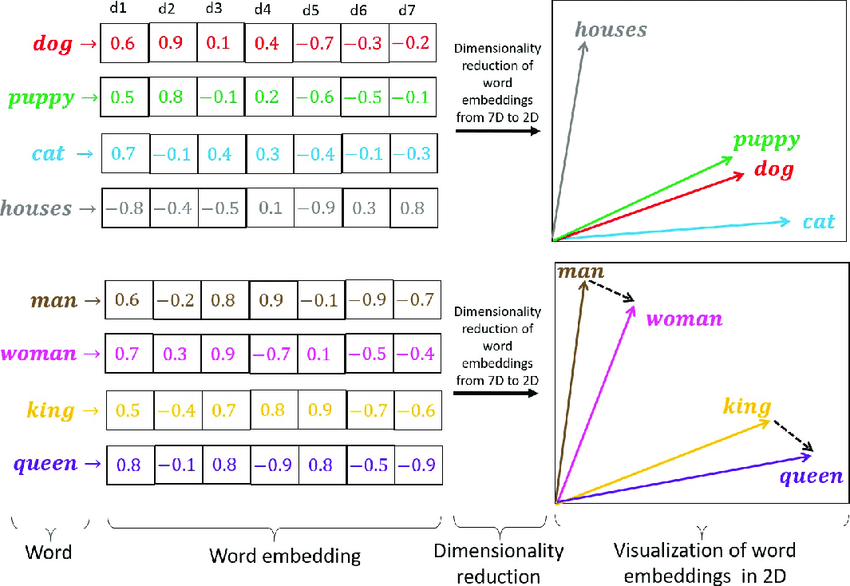

> https://www.researchgate.net/figure/Word-embeddings-map-words-in-a-corpus-of-text-to-vector-space-Linear-combinations-of_fig6_340825443

## OpenAI 모델

- 장점: 다국어 기본 지원, 좋은 성능, 쉬운 접근성,

- 단점: 유료, 데이터 유출 문제 존재

- 가격: $0.0004 per 1000 tokens

- https://platform.openai.com/docs/guides/embeddings/what-are-embeddings



In [ ]:
from openai import OpenAI

In [ ]:
client = OpenAI()

text = "안녕하세요. 저는 홍길동입니다."

# openai.Embedding.create()는 더이상 지원되지 않음, openai>=1.0.0
embed = client.embeddings.create(input=[text], model="text-embedding-ada-002") # .data[0].embedding

# openai.types.create_embedding_response.CreateEmbeddingResponse
# CreateEmbeddingResponse 객체의 data 속성에
# openai.types.embedding.Embedding 객체를 리스트로 담고 있고
# Embedding 객체의 embedding 속성에 임베드된 숫자들이 들어있음
type(embed)


openai.types.create_embedding_response.CreateEmbeddingResponse

In [ ]:
type(embed.data[0])

openai.types.embedding.Embedding

In [ ]:
# 임베딩 벡터 길이는 1536
type(embed.data[0].embedding), len(embed.data[0].embedding)

(list, 1536)

### 벡터 유사도 실험

In [ ]:
def cos_sim(a, b):
    return np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))

In [ ]:
sentences = [
    "이름이 무엇인가요?",
    "인공지능은 대단하군요.",
    "김철수는 아이돌 연습생입니다.",
    "김철수는 대한민국에 사는 2002년에 태어난 남자로 현재 24살입니다."
]

sents_embed = client.embeddings.create(input=sentences, model="text-embedding-ada-002").data

In [ ]:
query = "김철수는 몇 살인가요?"
query = "김철수는 무슨 일을 하나요?"

query_embed = client.embeddings.create(input=[query], model="text-embedding-ada-002").data[0].embedding

- 질문과 의미적으로 유사한 문장이 벡터로도 비슷한 방향을 가르키고 있는가?

- 후보 답변 문장에 직접적으로 `직업` 또는  `무슨 일을 합니다.`같은 유사한 단어들이 없어도 질문의 의미와 연관있는 답변을 유사한 벡터로 검색하는 것을 확인할 수 있음

In [ ]:
print(query)
print('-'*30)
for i, sent in enumerate(sentences):
    print(f"{sent}: {cos_sim(query_embed, sents_embed[i].embedding):.3f}")

김철수는 무슨 일을 하나요?
------------------------------
이름이 무엇인가요?: 0.846
인공지능은 대단하군요.: 0.797
김철수는 아이돌 연습생입니다.: 0.892
김철수는 대한민국에 사는 2002년에 태어난 남자로 현재 24살입니다.: 0.882


### LangChain: OpenAIEmbeddings

In [ ]:
from langchain_openai import OpenAIEmbeddings

In [ ]:
embeddings = OpenAIEmbeddings()

In [ ]:
sents_embed = embeddings.embed_documents(sentences)

In [ ]:
query = "김철수는 몇 살인가요?"
query = "김철수는 무슨 일을 하나요?"

query_embed = embeddings.embed_query(query)

In [ ]:
print(query)
print('-'*30)
for i, sent in enumerate(sentences):
    print(f"{sent}: {cos_sim(query_embed, sents_embed[i]):.3f}")

김철수는 무슨 일을 하나요?
------------------------------
이름이 무엇인가요?: 0.846
인공지능은 대단하군요.: 0.797
김철수는 아이돌 연습생입니다.: 0.892
김철수는 대한민국에 사는 2002년에 태어난 남자로 현재 24살입니다.: 0.882


## 오픈소스 모델: sentence-transformers

- 장점: 무료, 외부로 데이터가 전송되지 않음,

- 단점: api 모델 대비 어려운 접근성(모델 선택), 빠른 구동을 위해 GPU 필요


- 문장임베딩에 대한 좋은 글: https://blog.ml6.eu/the-art-of-pooling-embeddings-c56575114cf8

In [ ]:
# 허깅페이스 sentence-transformers 홈페이지
# https://huggingface.co/sentence-transformers

# sentence-transformers 도움말에 선학습 모델 설명
# https://www.sbert.net/docs/pretrained_models.html


from sentence_transformers import SentenceTransformer

In [ ]:
# 50개국 언어에 대한 임베딩 모델
model = SentenceTransformer('distiluse-base-multilingual-cased-v1')

.gitattributes:   0%|          | 0.00/690 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.45k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/556 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/539M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/452 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

In [ ]:
sents_embed = model.encode(sentences)

In [ ]:
# query = "김철수는 몇 살인가요?"
query = "김철수는 무슨 일을 하나요?"

query_embed = model.encode(query)

In [ ]:
print(query)
print('-'*30)
for i, sent in enumerate(sentences):
    print(f"{sent}: {cos_sim(query_embed, sents_embed[i]):.3f}")

김철수는 무슨 일을 하나요?
------------------------------
이름이 무엇인가요?: 0.401
인공지능은 대단하군요.: 0.089
김철수는 아이돌 연습생입니다.: 0.450
김철수는 대한민국에 사는 2002년에 태어난 남자로 현재 24살입니다.: 0.352


### LangChain: HuggingFaceEmbeddings

- https://python.langchain.com/docs/integrations/platforms/huggingface#embedding-models

In [ ]:
from langchain_community.embeddings import HuggingFaceEmbeddings

In [ ]:
model_hf = HuggingFaceEmbeddings(
    model_name='distiluse-base-multilingual-cased-v1',
    model_kwargs={'device':'cpu'},
    # encode_kwargs = {'normalize_embeddings': True}
)

In [ ]:
sents_embed = model_hf.embed_documents(sentences)

In [ ]:
# query = "김철수는 몇 살인가요?"
query = "김철수는 무슨 일을 하나요?"

query_embed = model_hf.embed_query(query)

In [ ]:
print(query)
print('-'*30)
for i, sent in enumerate(sentences):
    print(f"{sent}: {cos_sim(query_embed, sents_embed[i]):.3f}")

김철수는 무슨 일을 하나요?
------------------------------
이름이 무엇인가요?: 0.401
인공지능은 대단하군요.: 0.089
김철수는 아이돌 연습생입니다.: 0.450
김철수는 대한민국에 사는 2002년에 태어난 남자로 현재 24살입니다.: 0.352


## 엠베딩 모델 활용

### 제로샷 분류

- https://cookbook.openai.com/examples/zero-shot_classification_with_embeddings

In [ ]:
# gdown 에러 날때 다운 그레이드
!pip install gdown==4.6

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3


In [ ]:
# https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews

!gdown 1QwJWabh6i_NckGqDHtUvh-et5_FQOvTO
!gdown 1QwqkgMkUr_b5otq7hlKAtAq_gpLUdzHu

Downloading...
From: https://drive.google.com/uc?id=1QwJWabh6i_NckGqDHtUvh-et5_FQOvTO
To: /content/amazon_food_reviews.csv
100% 301M/301M [00:05<00:00, 53.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QwqkgMkUr_b5otq7hlKAtAq_gpLUdzHu
To: /content/amazon_food_reviews_openai_embed_1k.pkl
100% 14.7M/14.7M [00:00<00:00, 45.1MB/s]


In [ ]:
# embedding model parameters
embedding_model = "text-embedding-ada-002"
embedding_encoding = "cl100k_base"  # this the encoding for text-embedding-ada-002
max_tokens = 8000  # the maximum for text-embedding-ada-002 is 8191

In [ ]:
input_datapath = "amazon_food_reviews.csv"

df = pd.read_csv(input_datapath, index_col=0)
df = df[["Time", "ProductId", "UserId", "Score", "Summary", "Text"]]
df = df.dropna()

df["combined"] = (
    "Title: " + df.Summary.str.strip() + "; Content: " + df.Text.str.strip()
)

df.head(2)

,Time,ProductId,UserId,Score,Summary,Text,combined
Id,,,,,,,
1,1303862400,B001E4KFG0,A3SGXH7AUHU8GW,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,Title: Good Quality Dog Food; Content: I have ...
2,1346976000,B00813GRG4,A1D87F6ZCVE5NK,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Title: Not as Advertised; Content: Product arr...


In [ ]:
import tiktoken

In [ ]:
# subsample to 1k most recent reviews and remove samples that are too long
top_n = 1000

# 최근 리뷰 2000개
df = df.sort_values("Time").tail(top_n * 2)
df.drop("Time", axis=1, inplace=True)

# 토크나이저 초기화
encoding = tiktoken.get_encoding(embedding_encoding)

# 토크나이징해서 max_tokens보다 작은것 중에 1000개만 고름
df["n_tokens"] = df['combined'].apply(lambda x: len(encoding.encode(x)))
df = df[df.n_tokens <= max_tokens].tail(top_n)
len(df)


1000

In [ ]:
################################################################################
# openai 임베딩 요금 주의!
################################################################################
# 골라진 1000개 샘플을 임베딩
df["embedding"] = df['combined'].apply(
    lambda x: client.embeddings.create(
        input=x, model="text-embedding-ada-002"
    ).data[0].embedding
)


In [ ]:
# 위 과정 생략했으면 여기서 데이터 로딩
# df.to_pickle("amazon_food_reviews_openai_embed_1k.pkl")
df = pd.read_pickle("./amazon_food_reviews_openai_embed_1k.pkl")

In [ ]:
df.head()

,ProductId,UserId,Score,Summary,Text,combined,n_tokens,embedding
Id,,,,,,,,
284932,B003XPF9BO,A3R7JR3FMEBXQB,5,where does one start...and stop... with a tre...,Wanted to save some to bring to my Chicago fam...,Title: where does one start...and stop... wit...,52,"[0.007060592994093895, -0.02732112631201744, 0..."
220697,B003JK537S,A3JBPC3WFUT5ZP,1,Arrived in pieces,"Not pleased at all. When I opened the box, mos...",Title: Arrived in pieces; Content: Not pleased...,35,"[-0.023609420284628868, -0.011784634552896023,..."
107908,B000JMBE7M,AQX1N6A51QOKG,4,"It isn't blanc mange, but isn't bad . . .",I'm not sure that custard is really custard wi...,"Title: It isn't blanc mange, but isn't bad . ....",267,"[0.00016697357932571322, 0.005226491950452328,..."
107800,B004AHGBX4,A2UY46X0OSNVUQ,3,These also have SALT and it's not sea salt.,I like the fact that you can see what you're g...,Title: These also have SALT and it's not sea s...,239,"[0.010447735898196697, -0.01349444780498743, 0..."
205313,B001BORBHO,A1AFOYZ9HSM2CZ,5,Happy with the product,My dog was suffering with itchy skin. He had ...,Title: Happy with the product; Content: My dog...,86,"[0.015255776233971119, -0.003898625960573554, ..."


In [ ]:
# 3은 애매하니까 걸러내고...
# SettingWithCopyWarning 나는데 아래 구문에서 df는 복사본이라서
# 복사된 데이터 프레임을 고쳐도 원본이 변하지 않을 것이라고 경고하는 것임
# 경고를 없애려면 df = df[df.Score != 3].copy()
df = df[df.Score != 3]

# 1,2, 4,5만 예측 대상으로 타겟을 만듬
df.loc[:, 'sentiment'] = df['Score'].replace({1: "negative", 2: "negative", 4: "positive", 5: "positive"})


<ipython-input-42-675e57ce5b3d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'sentiment'] = df['Score'].replace({1: "negative", 2: "negative", 4: "positive", 5: "positive"})


In [ ]:
df.head()

,ProductId,UserId,Score,Summary,Text,combined,n_tokens,embedding,sentiment
Id,,,,,,,,,
284932,B003XPF9BO,A3R7JR3FMEBXQB,5,where does one start...and stop... with a tre...,Wanted to save some to bring to my Chicago fam...,Title: where does one start...and stop... wit...,52,"[0.007060592994093895, -0.02732112631201744, 0...",positive
220697,B003JK537S,A3JBPC3WFUT5ZP,1,Arrived in pieces,"Not pleased at all. When I opened the box, mos...",Title: Arrived in pieces; Content: Not pleased...,35,"[-0.023609420284628868, -0.011784634552896023,...",negative
107908,B000JMBE7M,AQX1N6A51QOKG,4,"It isn't blanc mange, but isn't bad . . .",I'm not sure that custard is really custard wi...,"Title: It isn't blanc mange, but isn't bad . ....",267,"[0.00016697357932571322, 0.005226491950452328,...",positive
205313,B001BORBHO,A1AFOYZ9HSM2CZ,5,Happy with the product,My dog was suffering with itchy skin. He had ...,Title: Happy with the product; Content: My dog...,86,"[0.015255776233971119, -0.003898625960573554, ...",positive
284450,B008PSM0BQ,A3OUFIMGL2K6RS,4,Good Sauce,This is a good all purpose sauce. Has good fl...,Title: Good Sauce; Content: This is a good all...,107,"[-0.016170555725693703, 0.005940747447311878, ...",positive


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
labels=[
    'An Amazon review with a negative sentiment.',
    'An Amazon review with a positive sentiment.'
]

label_embeddings = [
    client.embeddings.create(
            input=label, model="text-embedding-ada-002"
        ).data[0].embedding
    for label in labels
]

preds = df["embedding"].apply(
    lambda x: int(cos_sim(x, label_embeddings[0]) < cos_sim(x, label_embeddings[1]))
)
preds = preds.apply(lambda x: 'positive' if x==1 else 'negative')

report = classification_report(df.sentiment, preds)
print(report)

              precision    recall  f1-score   support

    negative       0.98      0.73      0.84       136
    positive       0.96      1.00      0.98       789

    accuracy                           0.96       925
   macro avg       0.97      0.86      0.91       925
weighted avg       0.96      0.96      0.96       925



#### [실습] NSMC 제로샷 분류

In [ ]:
# 데이터 로딩
!git clone https://github.com/e9t/nsmc.git


Cloning into 'nsmc'...
remote: Enumerating objects: 14763, done.
remote: Counting objects: 100% (14762/14762), done.
remote: Compressing objects: 100% (13012/13012), done.
remote: Total 14763 (delta 1748), reused 14762 (delta 1748), pack-reused 1
Receiving objects: 100% (14763/14763), 56.19 MiB | 16.44 MiB/s, done.
Resolving deltas: 100% (1748/1748), done.
Updating files: 100% (14737/14737), done.


In [ ]:
!gdown 1Qvvt5sgQeTJNkI1LYiWpz7O5dAz5rrkQ

Downloading...
From: https://drive.google.com/uc?id=1Qvvt5sgQeTJNkI1LYiWpz7O5dAz5rrkQ
To: /content/nsmc_embed_len20_1k.pkl
100% 17.1M/17.1M [00:00<00:00, 97.9MB/s]


In [ ]:
# 결과가 너무 안좋으면 너무 짧은 문장, 너무 긴 문장 제외해서 할 필요 있음
test_df = pd.read_csv("nsmc/ratings_test.txt", sep='\t')

In [ ]:
test_df['label'].value_counts()

1    25173
0    24827
Name: label, dtype: int64

In [ ]:
test_df.dtypes

id           int64
document    object
label        int64
dtype: object

In [ ]:
test_df['len'] = test_df.apply(lambda x: len(str(x['document'])), axis=1)

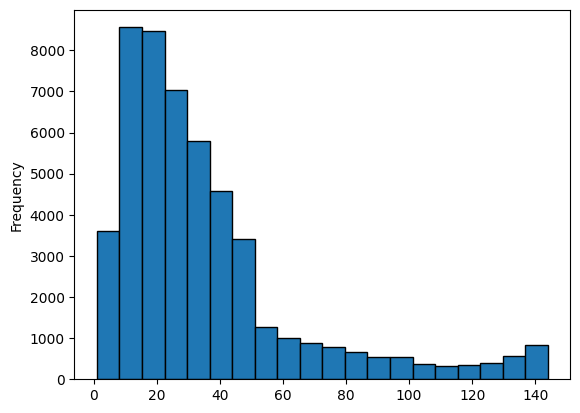

In [ ]:
test_df['len'].plot(kind='hist', bins=20, ec='k')
plt.show()

In [ ]:
test_df = test_df[test_df['len'] >= 20].sample(n=1000)

In [ ]:
test_df.head()

,id,document,label,len
7596,7299671,현실이 떠올라서 뜨끔한 영화다. 좋은 영화다.,1,25
40886,8890436,싱싱이~고구마~~달달하다~~둘이 다시 드라마 또 찍었으면 좋겠다,1,35
3524,4581889,정말 장나라 불쌍하다는 생각밖에는......,0,24
37707,9300190,이 영화 만드신 감독분이 저를 가르치셨던 교수님이신데 작품을 보지도 않고 장난식으로...,1,91
44307,6095453,..억지감동 3류쓰레기영화 시간아까웠음,0,21


In [ ]:
# 한국어 전용 임베딩 모델
model = SentenceTransformer('jhgan/ko-sbert-nli')

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.46k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/620 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

(…)imilarity_evaluation_sts-dev_results.csv:   0%|          | 0.00/1.57k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

(…)milarity_evaluation_sts-test_results.csv:   0%|          | 0.00/299 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/495k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/538 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [ ]:
# embedding
test_df['embedding_hf'] = test_df['document'].apply(lambda x: model.encode(x))
print('embedding_hf done')

################################################################################
# openai 임베딩 요금 주의!
################################################################################
# test_df['embedding_openai'] = test_df['document'].apply(
#     lambda x: client.embeddings.create(
#         input=[x], model="text-embedding-ada-002"
#     ).data[0].embedding
# )
# print('embedding_openai done')

# openai embedding 저장
# test_df.to_pickle("./nsmc_embed_len20_1k.pkl")


embedding_hf done


In [ ]:
# 위 임베딩 과정을 생략했다면 불러오기
test_df = pd.read_pickle("./nsmc_embed_len20_1k.pkl")

In [ ]:
test_df.head()

,id,document,label,len,embedding_hf,embedding_openai,pred_openai,pred_hf
11862,74940,예전에 아이큐점프에 연재될 때 무지 재미있었던 기억이...,1,32,"[-0.22789773, 0.5274178, 0.61552584, -0.086535...","[-0.00042056094389408827, -0.02983135730028152...",1,1
16615,1907483,영화도 망했는데 평점이라도 많이 준다.,0,21,"[1.0902214, 1.0357869, 0.81719095, 0.089382, -...","[-0.008809290826320648, -0.04163195937871933, ...",1,1
4132,3209546,박보영나와서봤다가 발견한 좋은 드라마. 단편으로 만들지말고 연작했으면 대박일텐데,1,44,"[1.0915534, 0.47139496, -0.048729405, -0.30403...","[-0.03185342252254486, -0.015966428443789482, ...",1,1
13999,5869373,우리반 친구들이랑 영화 찍기로 했는데 ㅋㅋ,1,23,"[-0.31433734, 0.7821149, 0.24937342, -0.129188...","[-0.006810571067035198, -0.03526220843195915, ...",1,1
32772,3281316,브루스윌리스표영화..예전에 재밌게봤음.,1,21,"[1.0291928, 0.18901494, 0.5214752, -0.22213522...","[-0.013840662315487862, -0.03410547971725464, ...",1,1


In [ ]:
# label embedding
labels = ['부정적인 느낌의 영화 리뷰', '긍정적인 느낌의 영화 리뷰']

In [ ]:
label_embed_hf = model.encode(labels)

# label_embed_openai = client.embeddings.create(
#         input=labels, model="text-embedding-ada-002"
#     ).data

# label_embed_openai = [d.embedding for d in label_embed_openai]

In [ ]:
def zero_shot_hf(x):
    return int(cos_sim(x['embedding_hf'], label_embed_hf[0]) < cos_sim(x['embedding_hf'], label_embed_hf[1]))

# def zero_shot_openai(x):
#     return int(cos_sim(x['embedding_openai'], label_embed_openai[0]) < cos_sim(x['embedding_openai'], label_embed_openai[1]))

test_df['pred_hf'] = test_df.apply(zero_shot_hf, axis=1)
# test_df['pred_openai'] = test_df.apply(zero_shot_openai, axis=1)

In [ ]:
test_df.head()

,id,document,label,len,embedding_hf,embedding_openai,pred_openai,pred_hf
11862,74940,예전에 아이큐점프에 연재될 때 무지 재미있었던 기억이...,1,32,"[-0.22789773, 0.5274178, 0.61552584, -0.086535...","[-0.00042056094389408827, -0.02983135730028152...",1,1
16615,1907483,영화도 망했는데 평점이라도 많이 준다.,0,21,"[1.0902214, 1.0357869, 0.81719095, 0.089382, -...","[-0.008809290826320648, -0.04163195937871933, ...",1,1
4132,3209546,박보영나와서봤다가 발견한 좋은 드라마. 단편으로 만들지말고 연작했으면 대박일텐데,1,44,"[1.0915534, 0.47139496, -0.048729405, -0.30403...","[-0.03185342252254486, -0.015966428443789482, ...",1,1
13999,5869373,우리반 친구들이랑 영화 찍기로 했는데 ㅋㅋ,1,23,"[-0.31433734, 0.7821149, 0.24937342, -0.129188...","[-0.006810571067035198, -0.03526220843195915, ...",1,1
32772,3281316,브루스윌리스표영화..예전에 재밌게봤음.,1,21,"[1.0291928, 0.18901494, 0.5214752, -0.22213522...","[-0.013840662315487862, -0.03410547971725464, ...",1,1


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
report =  classification_report(test_df['label'], test_df['pred_hf'])
print(report)

              precision    recall  f1-score   support

           0       0.75      0.83      0.79       503
           1       0.81      0.72      0.77       497

    accuracy                           0.78      1000
   macro avg       0.78      0.78      0.78      1000
weighted avg       0.78      0.78      0.78      1000



### 의미론적 텍스트 서치를 이용한 유사 챗봇

- 임베딩 벡터를 코사인 유사도를 사용해 검색하면 유사 텍스트를 검색할 수 있음

- https://cookbook.openai.com/examples/semantic_text_search_using_embeddings

- 아래는 아마존 음식 리뷰에 대한 간단한 검색 예제를 나타냄

- 사용자 리뷰를 전체 임베딩 시키고, 사용자 쿼리를 동일 임베딩 모델로 임베딩하여 코사인 유사도 검색

In [ ]:
def search_reviews(df, product_description, n=3, pprint=True):
    product_embedding = client.embeddings.create(
            input=product_description, model="text-embedding-ada-002"
        ).data[0].embedding

    df["similarity"] = df.embedding.apply(lambda x: cos_sim(x, product_embedding))

    results = (
        df.sort_values("similarity", ascending=False)
        .head(n)
        .combined.str.replace("Title: ", "")
        .str.replace("; Content:", ": ")
    )

    if pprint:
        for r in results:
            print(r[:200])
            print()
    return results

In [ ]:
# 맛있는 콩에 대한 리뷰 검색
results = search_reviews(df, "delicious beans", n=3)

Good Buy:  I liked the beans. They were vacuum sealed, plump and moist. Would recommend them for any use. I personally split and stuck them in some vodka to make vanilla extract. Yum!

Jamaican Blue beans:  Excellent coffee bean for roasting. Our family just purchased another 5 pounds for more roasting. Plenty of flavor and mild on acidity when roasted to a dark brown bean and befor

Delicious!:  I enjoy this white beans seasoning, it gives a rich flavor to the beans I just love it, my mother in law didn't know about this Zatarain's brand and now she is traying different seasoning



In [ ]:
# 배달이 좋지 못한 내용에 대한 리뷰 검색
results = search_reviews(df, "bad delivery", n=1)

great product, poor delivery:  The coffee is excellent and I am a repeat buyer.  Problem this time was with the UPS delivery.  They left the box in front of my garage door in the middle of the drivewa



#### [실습] 유사 챗봇

- 위에서 살표본 검색 기능을 이용하면 고객 응대용 유사 챗봇을 구현 가능

- Q,A 쌍의 데이터에서 Q를 임베딩하고 사용자 쿼리를 임베딩된 Q와 유사도 검색하여 해당 답변을 반환

- https://wikidocs.net/154530

- 챗봇 데이터 셋: https://github.com/songys/Chatbot_data

In [ ]:
import torch
import urllib

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/songys/Chatbot_data/master/ChatbotData.csv",
                           filename="ChatBotData.csv")

('ChatBotData.csv', <http.client.HTTPMessage at 0x7e0f27af07f0>)

In [ ]:
chat_df = pd.read_csv('ChatBotData.csv')
chat_df.head()

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0


In [ ]:
chat_df.shape

(11823, 3)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
model.to(device)

SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
)

In [ ]:
model.device

device(type='cuda', index=0)

In [ ]:
# T4쓰면 2분이면 끝남, 안쓰면 30분 이상
chat_df['embedding'] = chat_df.apply(lambda x: model.encode(x['Q']), axis = 1)

In [ ]:
chat_df.head()

,Q,A,label,embedding
0,12시 땡!,하루가 또 가네요.,0,"[-0.76927656, -1.3320209, 0.54404205, -0.25090..."
1,1지망 학교 떨어졌어,위로해 드립니다.,0,"[-1.0129422, -1.6932178, 0.42473668, 0.1812817..."
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0,"[-0.39125702, 0.7020122, -0.30691245, -0.84586..."
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0,"[-0.44374642, 0.9127581, -0.36658528, -0.74270..."
4,PPL 심하네,눈살이 찌푸려지죠.,0,"[0.4577929, 0.03970846, -0.13841614, 0.0859378..."


In [ ]:
def answer(question, n=3, return_max=True):
    embedding = model.encode(question)
    chat_df['similarity'] = chat_df.apply(lambda x: cos_sim(x['embedding'], embedding), axis=1)

    results = (
        chat_df.sort_values("similarity", ascending=False)
        .head(n)
    )

    if return_max:
        return results['A'].iloc[0]
    else:
        return results['A']

In [ ]:
answer("안녕하세요?")

'안녕하세요.'

In [ ]:
answer("좋은 아침입니다.")

'좋은 아침이에요.'

In [ ]:
answer("뭐하고 있었어요?")

'일해요.'

In [ ]:
answer("어떤 일을 하시나요?")

'저는 마음을 이어주는 위로봇입니다.'

In [ ]:
answer("그렇군요.. 최근 저도 좀 무력감에 시달리는것 같아요.")

'마음의 병이 조금씩 나아지길 바랍니다.'